In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

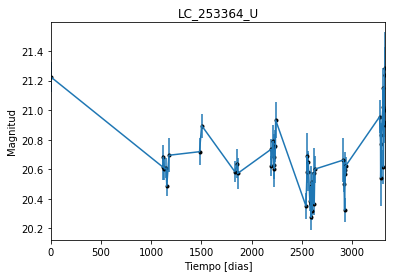

In [2]:
data = np.genfromtxt('LC_253364_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_253364_U')
plt.savefig("LC_253364_U.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

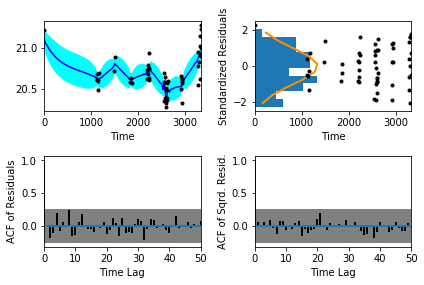

In [5]:
sample.assess_fit()

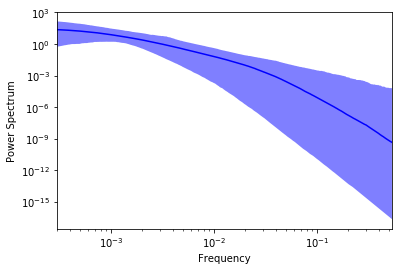

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

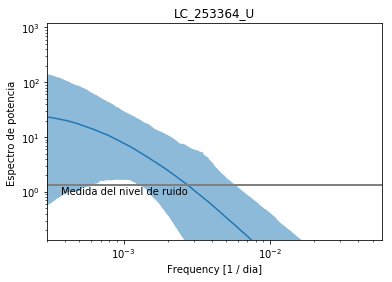

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_253364_U')
plt.savefig("Medida del nivel de ruido_U.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_253364_U')

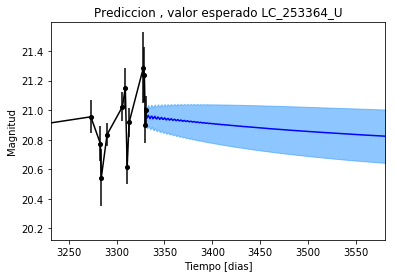

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_253364_U')

Text(0.5,1,'Prediccion, Caminos simulados_LC_253364_U')

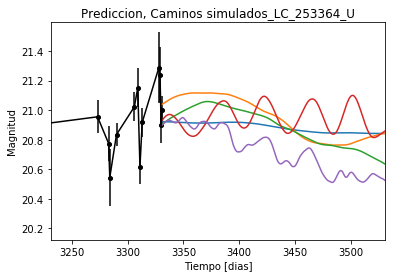

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_253364_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


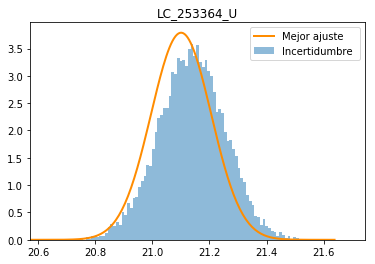

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_253364_U')
plt.savefig("Mejor_ajuste_LC_253364_U.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_253364_U')

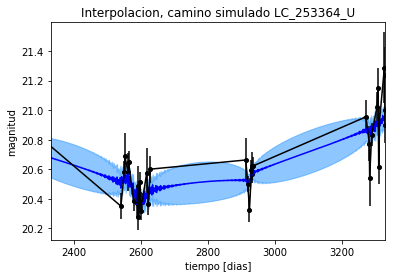

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_253364_U')

Text(0.5,1,'Interpolacion, camino simulado LC_253364_U')

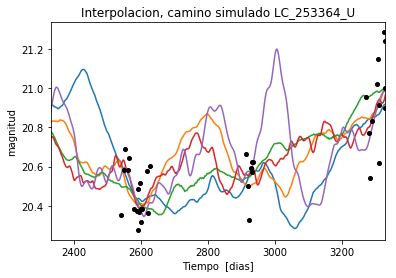

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_253364_U')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 835.745601834
Median: 0.0137793458351
Standard deviation: 0.198155997958
68% credibility interval: [ 0.0011308   0.16595273]
95% credibility interval: [  3.64706976e-04   8.09652156e-01]
99% credibility interval: [  3.14292288e-04   9.98485510e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 648.367840388
Median: 0.00350523100135
Standard deviation: 0.0903907330889
68% credibility interval: [ 0.00053687  0.04481457]
95% credibility interval: [ 0.00032609  0.2861412 ]
99% credibility interval: [  3.08567716e-04   6.36620866e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 872.855378132
Median: 0.0486162704092
Standard 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1355.96912288
Median: 52.9529492346
Standard deviation: 1.58354736338
68% credibility interval: [ 51.22257391  54.17029214]
95% credibility interval: [ 48.76592419  54.85752899]
99% credibility interval: [ 46.96321606  55.14740394]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 593.135868923
Median: 0.965094325663
Standard deviation: 2.40521487415
68% credibility interval: [ 0.11249204  4.52525513]
95% credibility interval: [ 0.01830817  8.40245991]
99% credibility interval: [  1.04439668e-02   1.12505137e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 960.812144415
Median: 0.914929903525
Standard deviation: 10.309474287
68% credibility interval: [  0.04667263  12.009371  ]
95% credibility interval: [  2.

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1349.1930375
Median: 9.58451814744e-25
Standard deviation: 1.00578864019e+57
68% credibility interval: [  5.97982794e-55   4.76124585e-04]
95% credibility interval: [  1.33362793e-82   8.52331374e+37]
99% credibility interval: [  3.14946060e-91   1.37026402e+46]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2215.55065466
Median: 20.7484549102
Standard deviation: 0.133973524283
68% credibility interval: [ 20.65082816  20.87873015]
95% credibility interval: [ 20.53911192  21.05654066]
99% credibility interval: [ 20.41364067  21.22300296]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 590.293966474
Median: 0.0317541879232
Standard deviation: 0.266190843046
68% credibility interval: [ 0.          0.44255117]
95% credibility interval: [ 0.          0.93974597]
99% credibility interval: [ 0.          1.03677734]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 590.293966474
Median: 0.0317541879232
Standard deviation: 0.266190843046
68% credibility interval: [ 0.          0.44255117]
95% credibility interval: [ 0.          0.93974597]
99% credibility interval: [ 0.          1.03677734]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 849.290473393
Median: 0.0
Standard deviation: 0.000623802489188
68% cr

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1355.96912288
Median: 52.9529492346
Standard deviation: 1.58354736338
68% credibility interval: [ 51.22257391  54.17029214]
95% credibility interval: [ 48.76592419  54.85752899]
99% credibility interval: [ 46.96321606  55.14740394]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1781.50977456
Median: 0.0594673136166
Standard deviation: 0.0721284544187
68% credibility interval: [ 0.0344636   0.10999574]
95% credibility interval: [ 0.02076945  0.24426667]
99% credibility interval: [ 0.01528104  0.43466567]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1566.3607688
Median: 1.2038436331
Standard deviation: 0.201547209238
68% credibility interval: [ 1.01994015  1.42047613]
95% credibility interval: [ 0.88416227  1.67043037]
99% credibility interval: [ 0.80180652  1.82949267]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 639.730640649
Median: 0.000850945161441
Standard deviation: 0.375767973585
68% credibility interval: [  1.51037471e-06   5.38735948e-02]
95% credibility interval: [  7.16562254e-41   8.39144769e-01]
99% credibility interval: [  3.01720784e-49   2.71199988e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 835.745601834
Median: (-0.0865781832936-0.273610894909j)
Standard deviation: 2.08506502769
68% credibility interval: [-1.04271174-0.21161088j -0.00710500-0.28833014j]
95% credibility interval: [ -5.08719453e+00+0.j          -2.29152151e-03-0.32536937j]
99% credibility interval: [ -6.27366948e+00-0.48704951j  -1.97475668e-03-5.37306404j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 648.367840388
Median: (-0.022024015926+0.174838480454j)
Standard deviation: 1.76632452924
68% credibility interval: [-0.28157822+0.69411844j -0.00337323+5.59870675j]
95% credibility interval: [-1.79787821+2.62310545j -0.00204887+1.43198065j]
99% credibility interval: [ -4.00000687e+00+3.50902216j  -1.93878814e-03+0.j        ]
Posterior sum